<a href="https://colab.research.google.com/github/Abirami-Baskaran-s/Business-Analytics-and-Operations-Intelligence/blob/main/Business_Operations_Analytics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")




Libraries loaded successfully!


In [ ]:
print("=" * 60)
print(" LINEAR REGRESSION")
print("Predicting Sales from Marketing Spend")
print("=" * 60)


np.random.seed(42)
marketing_spend = np.random.randint(1000, 10000, 100)
sales = marketing_spend * 1.2 + np.random.normal(0, 500, 100)


df_sales = pd.DataFrame({
    'Marketing_Spend': marketing_spend,
    'Sales': sales
})

print("Sample of our sales data:")
print(df_sales.head())
print(f"\nDataset size: {len(df_sales)} companies")


 LINEAR REGRESSION
Predicting Sales from Marketing Spend
Sample of our sales data:
   Marketing_Spend        Sales
0             8270  8901.788489
1             1860  2766.740443
2             6390  7201.118580
3             6191  7821.304094
4             6734  7773.362120

Dataset size: 100 companies


In [ ]:

X = df_sales[['Marketing_Spend']]
y = df_sales['Sales']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} companies")
print(f"Testing set: {len(X_test)} companies")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model training completed!")

Training set: 80 companies
Testing set: 20 companies
Model training completed!


In [ ]:

y_pred = lr_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nLinear Regression Results:")
print(f"R² Score: {r2:.3f} (How well our model explains the data)")
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Model Coefficient: {lr_model.coef_[0]:.3f}")
print(f"\nBusiness Insight:")
print(f"For every $1 increase in marketing spend, sales increase by ${lr_model.coef_[0]:.2f}")


print(f"\nSample Predictions:")
for i in range(5):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    marketing = X_test.iloc[i, 0]
    print(f"Marketing: ${marketing:,} → Predicted Sales: ${predicted:,.0f} (Actual: ${actual:,.0f})")


Linear Regression Results:
R² Score: 0.975 (How well our model explains the data)
Mean Squared Error: $207996.49
Model Coefficient: 1.178

Business Insight:
For every $1 increase in marketing spend, sales increase by $1.18

Sample Predictions:
Marketing: $3,695 → Predicted Sales: $4,467 (Actual: $4,773)
Marketing: $2,021 → Predicted Sales: $2,495 (Actual: $2,305)
Marketing: $5,887 → Predicted Sales: $7,048 (Actual: $8,031)
Marketing: $8,099 → Predicted Sales: $9,653 (Actual: $9,705)
Marketing: $6,486 → Predicted Sales: $7,753 (Actual: $7,775)


In [ ]:
print("\n" + "=" * 60)
print("LOGISTIC REGRESSION")
print("Predicting Customer Churn")
print("=" * 60)


np.random.seed(42)
n_customers = 200
age = np.random.randint(20, 70, n_customers)
monthly_spend = np.random.randint(50, 500, n_customers)


churn_prob = (age * 0.02 - monthly_spend * 0.001 + np.random.normal(0, 0.1, n_customers))
churn = (churn_prob > 0.5).astype(int)

df_churn = pd.DataFrame({
    'Age': age,
    'Monthly_Spend': monthly_spend,
    'Churn': churn
})

print("Sample customer data:")
print(df_churn.head())
print(f"\nOverall churn rate: {churn.mean():.1%}")
print(f"Total customers analyzed: {len(df_churn)}")





LOGISTIC REGRESSION
Predicting Customer Churn
Sample customer data:
   Age  Monthly_Spend  Churn
0   58            364      1
1   48            423      0
2   34            209      0
3   62            145      1
4   27            282      0

Overall churn rate: 61.0%
Total customers analyzed: 200


In [ ]:

X = df_churn[['Age', 'Monthly_Spend']]
y = df_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data prepared and scaled for machine learning")


log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)


y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)

print(f"\nLogistic Regression Results:")
print(f"Prediction Accuracy: {accuracy:.1%}")
print(f"Model can correctly identify {accuracy:.1%} of potential churners")


Data prepared and scaled for machine learning

Logistic Regression Results:
Prediction Accuracy: 92.5%
Model can correctly identify 92.5% of potential churners


In [ ]:

print(f"\nDetailed Customer Analysis:")
print(f"{'Age':<4} {'Spend':<6} {'Churn Risk':<11} {'Actual':<7} {'Action Needed'}")
print("-" * 50)

for i in range(10):
    age = X_test.iloc[i, 0]
    spend = X_test.iloc[i, 1]
    risk = y_pred_proba[i]
    actual = y_test.iloc[i]
    action = "High Priority" if risk > 0.7 else "Monitor" if risk > 0.3 else "Low Risk"

    print(f"{age:<4} ${spend:<5} {risk:<10.1%} {actual:<7} {action}")



Detailed Customer Analysis:
Age  Spend  Churn Risk  Actual  Action Needed
--------------------------------------------------
34   $434   7.2%       0       Low Risk
22   $150   7.4%       0       Low Risk
46   $175   91.7%      1       High Priority
42   $87    91.3%      1       High Priority
63   $433   97.5%      1       High Priority
60   $124   99.7%      1       High Priority
48   $197   93.3%      1       High Priority
21   $333   1.2%       0       Low Risk
47   $353   72.6%      1       High Priority
44   $304   68.6%      1       Monitor


In [ ]:
print("\n" + "=" * 60)
print("DECISION TREE")
print("Classifying Employee Performance")
print("=" * 60)


np.random.seed(42)
n_employees = 150
years_experience = np.random.randint(1, 20, n_employees)
training_hours = np.random.randint(10, 100, n_employees)


performance_score = (years_experience * 3 + training_hours * 0.5 + np.random.normal(0, 5, n_employees))

performance = pd.cut(performance_score, bins=3, labels=[0, 1, 2]).astype(int)

df_performance = pd.DataFrame({
    'Years_Experience': years_experience,
    'Training_Hours': training_hours,
    'Performance': performance
})

print("Sample employee data:")
print(df_performance.head())


performance_counts = df_performance['Performance'].value_counts().sort_index()
print(f"\nPerformance Distribution:")
print(f"Poor (0): {performance_counts[0]} employees")
print(f"Average (1): {performance_counts[1]} employees")
print(f"Excellent (2): {performance_counts[2]} employees")



DECISION TREE
Classifying Employee Performance
Sample employee data:
   Years_Experience  Training_Hours  Performance
0                 7              53            1
1                15              33            1
2                11              88            2
3                 8              68            1
4                 7              41            0

Performance Distribution:
Poor (0): 38 employees
Average (1): 86 employees
Excellent (2): 26 employees


In [ ]:

X = df_performance[['Years_Experience', 'Training_Hours']]
y = df_performance['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Results:")
print(f"Classification Accuracy: {accuracy:.1%}")
print(f"\nFeature Importance (what matters most for performance):")
for feature, importance in zip(X.columns, dt_model.feature_importances_):
    print(f"  {feature}: {importance:.1%}")


print(f"\nSample Predictions:")
for i in range(5):
    exp = X_test.iloc[i, 0]
    training = X_test.iloc[i, 1]
    predicted = y_pred[i]
    actual = y_test.iloc[i]
    performance_level = ['Poor', 'Average', 'Excellent'][predicted]
    print(f"Experience: {exp} years, Training: {training}h → {performance_level} (Actual: {['Poor', 'Average', 'Excellent'][actual]})")


Decision Tree Results:
Classification Accuracy: 80.0%

Feature Importance (what matters most for performance):
  Years_Experience: 41.6%
  Training_Hours: 58.4%

Sample Predictions:
Experience: 7 years, Training: 11h → Poor (Actual: Poor)
Experience: 17 years, Training: 11h → Average (Actual: Average)
Experience: 17 years, Training: 85h → Excellent (Actual: Excellent)
Experience: 11 years, Training: 46h → Average (Actual: Average)
Experience: 12 years, Training: 21h → Average (Actual: Average)


In [ ]:
print("\n" + "=" * 60)
print("RANDOM FOREST")
print("Enhanced Employee Performance Prediction")
print("=" * 60)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"Classification Accuracy: {accuracy_rf:.1%}")
print(f"Improvement over Single Decision Tree: +{(accuracy_rf - accuracy)*100:.1f} percentage points")

print(f"\nUpdated Feature Importance:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"  {feature}: {importance:.1%}")

print(f"\nModel Comparison on Same Employees:")
print(f"{'Experience':<11} {'Training':<8} {'Decision Tree':<13} {'Random Forest':<13} {'Actual'}")
print("-" * 60)
for i in range(5):
    exp = X_test.iloc[i, 0]
    training = X_test.iloc[i, 1]
    dt_pred = ['Poor', 'Average', 'Excellent'][y_pred[i]]
    rf_pred = ['Poor', 'Average', 'Excellent'][y_pred_rf[i]]
    actual = ['Poor', 'Average', 'Excellent'][y_test.iloc[i]]
    print(f"{exp:<11} {training}h{'':<6} {dt_pred:<13} {rf_pred:<13} {actual}")


RANDOM FOREST
Enhanced Employee Performance Prediction
Random Forest Results:
Classification Accuracy: 100.0%
Improvement over Single Decision Tree: +20.0 percentage points

Updated Feature Importance:
  Revenue: 63.1%
  Customer_Count: 36.9%

Model Comparison on Same Employees:
Experience  Training Decision Tree Random Forest Actual
------------------------------------------------------------
17.607390048162863 114.45064193866483h       Poor          Poor          Poor
30.285611131094576 128.4518947398092h       Average       Poor          Poor
23.829233126383322 108.80285640700406h       Excellent     Average       Average
29.656400595580994 112.40774873554035h       Average       Poor          Poor
19.245032112888488 81.44573933682878h       Average       Poor          Poor


In [ ]:
print("\n" + "=" * 60)
print("SUPPORT VECTOR MACHINE (SVM)")
print("Product Quality Classification")
print("=" * 60)


np.random.seed(42)
n_products = 120
temperature = np.random.normal(25, 5, n_products)
pressure = np.random.normal(100, 15, n_products)


quality = ((temperature > 22) & (temperature < 28) &
           (pressure > 85) & (pressure < 115)).astype(int)

df_quality = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'Quality': quality
})

print("Sample manufacturing data:")
print(df_quality.head())
print(f"\nQuality Rate: {quality.mean():.1%} of products meet standards")
print(f"Total products tested: {len(df_quality)}")



SUPPORT VECTOR MACHINE (SVM)
Product Quality Classification
Sample manufacturing data:
   Temperature    Pressure  Quality
0    27.483571  111.865479        1
1    24.308678   86.359188        1
2    28.238443  121.041915        0
3    32.615149   78.972234        0
4    23.829233  108.802856        1

Quality Rate: 39.2% of products meet standards
Total products tested: 120


In [ ]:

X = df_quality[['Temperature', 'Pressure']]
y = df_quality['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)


y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM Classification Results:")
print(f"Quality Prediction Accuracy: {accuracy_svm:.1%}")
print(f"Number of Support Vectors: {len(svm_model.support_)} (key data points for decision boundary)")


print(f"\nQuality Control Predictions:")
print(f"{'Temperature':<12} {'Pressure':<9} {'Predicted':<10} {'Actual':<7} {'Status'}")
print("-" * 55)
for i in range(8):
    temp = X_test.iloc[i, 0]
    press = X_test.iloc[i, 1]
    pred = y_pred_svm[i]
    actual = y_test.iloc[i]
    status = "✓ Correct" if pred == actual else "✗ Missed"
    quality_pred = "Pass" if pred == 1 else "Fail"
    quality_actual = "Pass" if actual == 1 else "Fail"

    print(f"{temp:<12.1f} {press:<9.1f} {quality_pred:<10} {quality_actual:<7} {status}")


SVM Classification Results:
Quality Prediction Accuracy: 91.7%
Number of Support Vectors: 41 (key data points for decision boundary)

Quality Control Predictions:
Temperature  Pressure  Predicted  Actual  Status
-------------------------------------------------------
17.6         114.5     Fail       Fail    ✓ Correct
30.3         128.5     Fail       Fail    ✓ Correct
23.8         108.8     Pass       Pass    ✓ Correct
29.7         112.4     Fail       Fail    ✓ Correct
19.2         81.4      Fail       Fail    ✓ Correct
29.1         96.6      Fail       Fail    ✓ Correct
32.8         81.3      Fail       Fail    ✓ Correct
22.7         76.7      Fail       Fail    ✓ Correct


In [ ]:
print("\n" + "=" * 60)
print("K-MEANS CLUSTERING")
print("Customer Segmentation Analysis")
print("=" * 60)


np.random.seed(42)
n_customers = 200


segment1_income = np.random.normal(30000, 5000, 60)
segment1_spend = np.random.normal(15000, 3000, 60)

segment2_income = np.random.normal(60000, 8000, 70)
segment2_spend = np.random.normal(35000, 5000, 70)

segment3_income = np.random.normal(90000, 10000, 70)
segment3_spend = np.random.normal(55000, 8000, 70)

annual_income = np.concatenate([segment1_income, segment2_income, segment3_income])
annual_spend = np.concatenate([segment1_spend, segment2_spend, segment3_spend])

df_customers = pd.DataFrame({
    'Annual_Income': annual_income,
    'Annual_Spend': annual_spend
})

print("Sample customer data:")
print(df_customers.head())
print(f"\nDataset: {len(df_customers)} customers")
print(f"Income range: ${df_customers['Annual_Income'].min():,.0f} - ${df_customers['Annual_Income'].max():,.0f}")
print(f"Spend range: ${df_customers['Annual_Spend'].min():,.0f} - ${df_customers['Annual_Spend'].max():,.0f}")


EXERCISE 6: K-MEANS CLUSTERING
Customer Segmentation Analysis
Sample customer data:
   Annual_Income  Annual_Spend
0   32483.570765  13562.477286
1   29308.678494  14443.023070
2   33238.442691  11680.995078
3   37615.149282  11411.380128
4   28829.233126  17437.577467

Dataset: 200 customers
Income range: $20,202 - $111,330
Spend range: $7,141 - $72,518


In [ ]:

X = df_customers[['Annual_Income', 'Annual_Spend']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

df_customers['Cluster'] = clusters

print(f"K-Means Clustering Results:")
print(f"Discovered {len(np.unique(clusters))} customer segments")

print(f"\nCluster Centers (Average customer in each segment):")
segment_names = ['Budget Conscious', 'Middle Market', 'Premium']
for i, (center, name) in enumerate(zip(kmeans.cluster_centers_, segment_names)):
    print(f"  {name}: Income=${center[0]:,.0f}, Spend=${center[1]:,.0f}")

print(f"\nCustomer Distribution:")
cluster_counts = df_customers['Cluster'].value_counts().sort_index()
for i, (count, name) in enumerate(zip(cluster_counts, segment_names)):
    percentage = count / len(df_customers) * 100
    print(f"  {name}: {count} customers ({percentage:.1f}%)")


print(f"\nSample Customers by Segment:")
for cluster in range(3):
    segment_data = df_customers[df_customers['Cluster'] == cluster].head(3)
    print(f"\n{segment_names[cluster]} Customers:")
    for idx, row in segment_data.iterrows():
        print(f"  Income: ${row['Annual_Income']:,.0f}, Spend: ${row['Annual_Spend']:,.0f}")


K-Means Clustering Results:
Discovered 3 customer segments

Cluster Centers (Average customer in each segment):
  Budget Conscious: Income=$60,170, Spend=$36,012
  Middle Market: Income=$91,331, Spend=$55,105
  Premium: Income=$29,227, Spend=$14,989

Customer Distribution:
  Budget Conscious: 71 customers (35.5%)
  Middle Market: 69 customers (34.5%)
  Premium: 60 customers (30.0%)

Sample Customers by Segment:

Budget Conscious Customers:
  Income: $66,328, Spend: $32,767
  Income: $52,725, Spend: $39,282
  Income: $71,222, Spend: $36,070

Middle Market Customers:
  Income: $81,761, Spend: $37,025
  Income: $80,731, Spend: $54,902
  Income: $89,405, Spend: $47,822

Premium Customers:
  Income: $32,484, Spend: $13,562
  Income: $29,309, Spend: $14,443
  Income: $33,238, Spend: $11,681


In [ ]:
print("\n" + "=" * 60)
print("DATA PREPROCESSING & FEATURE SELECTION")
print("Preparing Real-World Business Data")
print("=" * 60)


np.random.seed(42)
n_samples = 200


revenue = np.random.normal(500000, 100000, n_samples)
customers = np.random.normal(1000, 200, n_samples)
random_metric1 = np.random.random(n_samples) * 100
marketing_spend = np.random.normal(50000, 15000, n_samples)
random_metric2 = np.random.random(n_samples) * 50


success_score = (revenue * 0.00001 + marketing_spend * 0.00002 + np.random.normal(0, 2, n_samples))
business_success = (success_score > np.median(success_score)).astype(int)

df_business = pd.DataFrame({
    'Revenue': revenue,
    'Customer_Count': customers,
    'Random_Metric_1': random_metric1,
    'Marketing_Spend': marketing_spend,
    'Random_Metric_2': random_metric2,
    'Business_Success': business_success
})

print("Original business dataset:")
print(df_business.head())
print(f"Dataset shape: {df_business.shape}")


DATA PREPROCESSING & FEATURE SELECTION
Preparing Real-World Business Data
Original business dataset:
         Revenue  Customer_Count  Random_Metric_1  Marketing_Spend  \
0  549671.415301     1071.557472        41.481950     55064.039931   
1  486173.569883     1112.156905        27.340707     43821.845508   
2  564768.853810     1216.610249         5.637550     42685.906639   
3  652302.985641     1210.760410        86.472238     43511.627183   
4  476584.662528      724.466126        81.290101     55916.782136   

   Random_Metric_2  Business_Success  
0        28.320232                 1  
1        23.802520                 0  
2        33.183558                 0  
3        46.841487                 1  
4        36.628605                 1  
Dataset shape: (200, 6)


In [ ]:

print(f"\nSimulating real-world data issues...")


missing_indices = np.random.choice(df_business.index, 15, replace=False)
df_business.loc[missing_indices[:10], 'Customer_Count'] = np.nan
df_business.loc[missing_indices[10:], 'Marketing_Spend'] = np.nan

print(f"Missing values introduced:")
missing_counts = df_business.isnull().sum()
for col, count in missing_counts.items():
    if count > 0:
        print(f"  {col}: {count} missing values ({count/len(df_business)*100:.1f}%)")


print(f"\nCleaning data...")
df_business['Customer_Count'].fillna(df_business['Customer_Count'].median(), inplace=True)
df_business['Marketing_Spend'].fillna(df_business['Marketing_Spend'].mean(), inplace=True)

print(f"Missing values after cleaning:")
print(df_business.isnull().sum().sum(), "total missing values")


Simulating real-world data issues...
Missing values introduced:
  Customer_Count: 10 missing values (5.0%)
  Marketing_Spend: 5 missing values (2.5%)

Cleaning data...
Missing values after cleaning:
0 total missing values


In [ ]:

X = df_business.drop('Business_Success', axis=1)
y = df_business['Business_Success']


selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)


feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Score': selector.scores_
}).sort_values('Importance_Score', ascending=False)

print(f"Feature Importance Analysis:")
print(f"{'Feature':<18} {'Score':<10} {'Business Value'}")
print("-" * 50)

business_explanations = {
    'Revenue': 'Direct business outcome',
    'Marketing_Spend': 'Investment in growth',
    'Customer_Count': 'Market reach indicator',
    'Random_Metric_1': 'No clear business logic',
    'Random_Metric_2': 'No clear business logic'
}

for _, row in feature_scores.iterrows():
    feature = row['Feature']
    score = row['Importance_Score']
    explanation = business_explanations[feature]
    print(f"{feature:<18} {score:<10.1f} {explanation}")


selected_features = X.columns[selector.get_support()]
print(f"\nRecommended features for modeling: {list(selected_features)}")


print(f"\nBusiness Recommendation:")
print(f"Focus your analytics on: {', '.join(selected_features)}")
print(f"These features have the strongest relationship with business success.")



Feature Importance Analysis:
Feature            Score      Business Value
--------------------------------------------------
Revenue            32.3       Direct business outcome
Random_Metric_2    1.6        No clear business logic
Marketing_Spend    1.2        Investment in growth
Random_Metric_1    1.2        No clear business logic
Customer_Count     0.5        Market reach indicator

Recommended features for modeling: ['Revenue', 'Marketing_Spend', 'Random_Metric_2']

Business Recommendation:
Focus your analytics on: Revenue, Marketing_Spend, Random_Metric_2
These features have the strongest relationship with business success.


MACHINE LEARNING PROJECT - COMPLETE VISUALIZATIONS

LINEAR REGRESSION VISUALIZATIONS


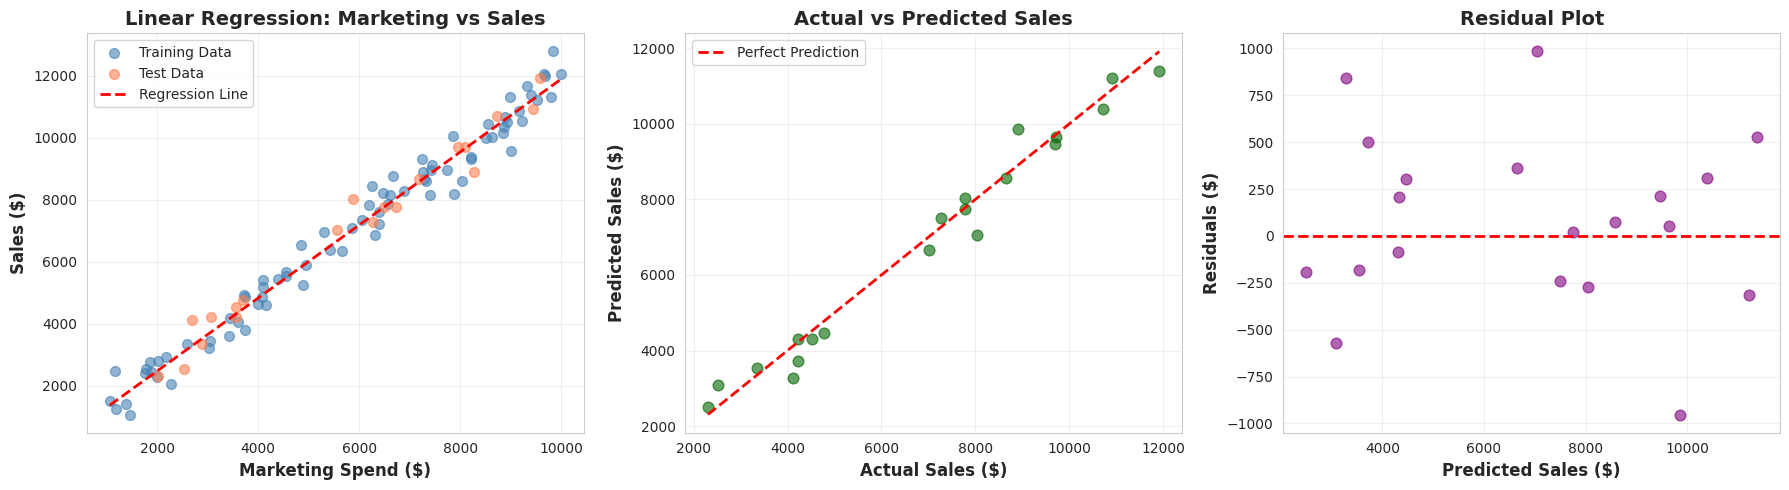

✓ Linear Regression visualizations created
  R² Score: 0.975
  Coefficient: $1.18 sales per $1 marketing


In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("=" * 70)
print("MACHINE LEARNING PROJECT - COMPLETE VISUALIZATIONS")
print("=" * 70)

print("\n" + "=" * 70)
print("LINEAR REGRESSION VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
marketing_spend = np.random.randint(1000, 10000, 100)
sales = marketing_spend * 1.2 + np.random.normal(0, 500, 100)

df_sales = pd.DataFrame({
    'Marketing_Spend': marketing_spend,
    'Sales': sales
})

X = df_sales[['Marketing_Spend']]
y = df_sales['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


axes[0].scatter(X_train, y_train, alpha=0.6, color='steelblue', label='Training Data', s=50)
axes[0].scatter(X_test, y_test, alpha=0.6, color='coral', label='Test Data', s=50)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = lr_model.predict(X_range)
axes[0].plot(X_range, y_range, 'r--', linewidth=2, label='Regression Line')
axes[0].set_xlabel('Marketing Spend ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Sales ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Linear Regression: Marketing vs Sales', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].scatter(y_test, y_pred, alpha=0.6, color='darkgreen', s=60)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Sales ($)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Sales ($)', fontsize=12, fontweight='bold')
axes[1].set_title('Actual vs Predicted Sales', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


residuals = y_test - y_pred
axes[2].scatter(y_pred, residuals, alpha=0.6, color='purple', s=60)
axes[2].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[2].set_xlabel('Predicted Sales ($)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residuals ($)', fontsize=12, fontweight='bold')
axes[2].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('1_linear_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Linear Regression visualizations created")
print(f"  R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"  Coefficient: ${lr_model.coef_[0]:.2f} sales per $1 marketing")



LOGISTIC REGRESSION VISUALIZATIONS


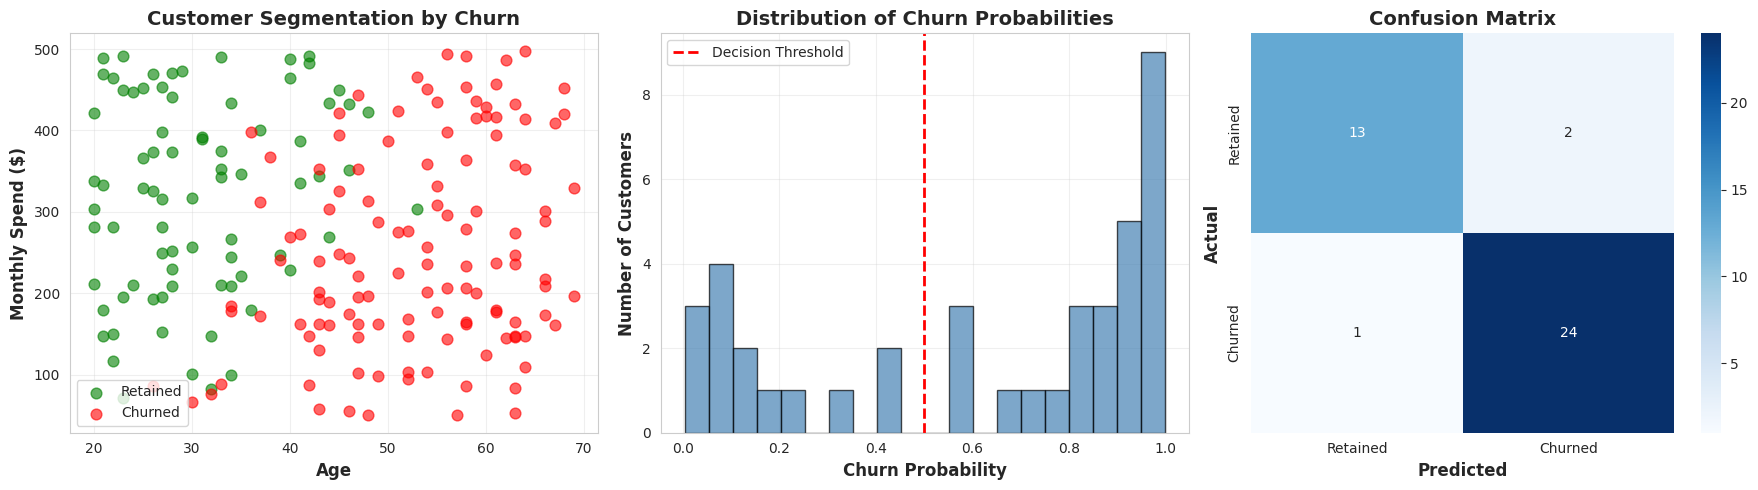

✓ Logistic Regression visualizations created
  Accuracy: 92.5%
  Churn Rate: 61.0%


In [ ]:
print("\n" + "=" * 70)
print("LOGISTIC REGRESSION VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
n_customers = 200
age = np.random.randint(20, 70, n_customers)
monthly_spend = np.random.randint(50, 500, n_customers)

churn_prob = (age * 0.02 - monthly_spend * 0.001 + np.random.normal(0, 0.1, n_customers))
churn = (churn_prob > 0.5).astype(int)

df_churn = pd.DataFrame({
    'Age': age,
    'Monthly_Spend': monthly_spend,
    'Churn': churn
})

X = df_churn[['Age', 'Monthly_Spend']]
y = df_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


churned = df_churn[df_churn['Churn'] == 1]
retained = df_churn[df_churn['Churn'] == 0]
axes[0].scatter(retained['Age'], retained['Monthly_Spend'], alpha=0.6,
                color='green', label='Retained', s=60)
axes[0].scatter(churned['Age'], churned['Monthly_Spend'], alpha=0.6,
                color='red', label='Churned', s=60)
axes[0].set_xlabel('Age', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Monthly Spend ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Customer Segmentation by Churn', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[1].hist(y_pred_proba, bins=20, alpha=0.7, color='steelblue', edgecolor='black')
axes[1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1].set_xlabel('Churn Probability', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution of Churn Probabilities', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'], cbar=True)
axes[2].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[2].set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('2_logistic_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Logistic Regression visualizations created")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.1%}")
print(f"  Churn Rate: {churn.mean():.1%}")


DECISION TREE & RANDOM FOREST VISUALIZATIONS


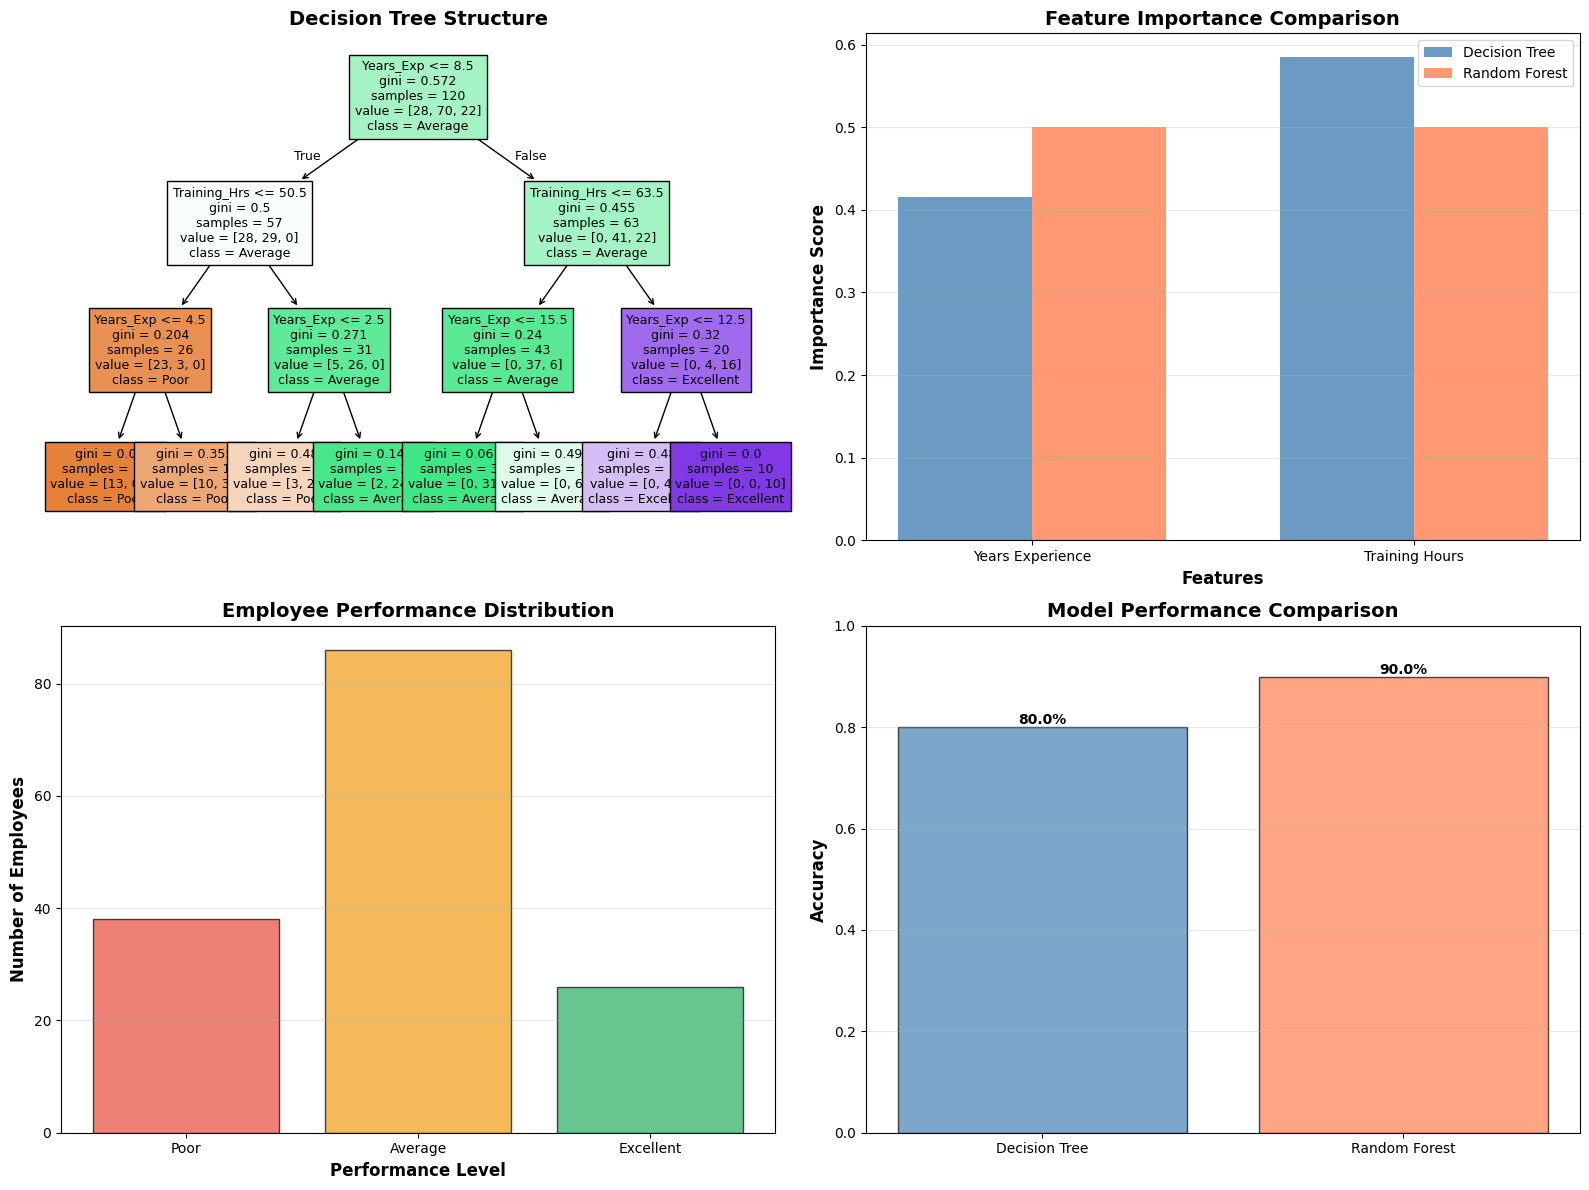

✓ Decision Tree & Random Forest visualizations created
  Decision Tree Accuracy: 80.0%
  Random Forest Accuracy: 90.0%


In [3]:
print("\n" + "=" * 70)
print("DECISION TREE & RANDOM FOREST VISUALIZATIONS")
print("=" * 70)

np.random.seed(42)
n_employees = 150
years_experience = np.random.randint(1, 20, n_employees)
training_hours = np.random.randint(10, 100, n_employees)

performance_score = (years_experience * 3 + training_hours * 0.5 + np.random.normal(0, 5, n_employees))
performance = pd.cut(performance_score, bins=3, labels=[0, 1, 2]).astype(int)

df_performance = pd.DataFrame({
    'Years_Experience': years_experience,
    'Training_Hours': training_hours,
    'Performance': performance
})

X = df_performance[['Years_Experience', 'Training_Hours']]
y = df_performance['Performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))


plot_tree(dt_model, feature_names=['Years_Exp', 'Training_Hrs'],
          class_names=['Poor', 'Average', 'Excellent'],
          filled=True, ax=axes[0, 0], fontsize=9)
axes[0, 0].set_title('Decision Tree Structure', fontsize=14, fontweight='bold')


features = ['Years Experience', 'Training Hours']
dt_importance = dt_model.feature_importances_
rf_importance = rf_model.feature_importances_

x_pos = np.arange(len(features))
width = 0.35
axes[0, 1].bar(x_pos - width/2, dt_importance, width, label='Decision Tree',
               color='steelblue', alpha=0.8)
axes[0, 1].bar(x_pos + width/2, rf_importance, width, label='Random Forest',
               color='coral', alpha=0.8)
axes[0, 1].set_xlabel('Features', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Importance Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Feature Importance Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(features)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')


performance_labels = ['Poor', 'Average', 'Excellent']
performance_counts = df_performance['Performance'].value_counts().sort_index()
colors = ['#e74c3c', '#f39c12', '#27ae60']
axes[1, 0].bar(performance_labels, performance_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Performance Level', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Employees', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Employee Performance Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')


models = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
colors_acc = ['steelblue', 'coral']
bars = axes[1, 1].bar(models, accuracies, color=colors_acc, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(True, alpha=0.3, axis='y')


for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('3_4_decision_tree_random_forest.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Decision Tree & Random Forest visualizations created")
print(f"  Decision Tree Accuracy: {accuracies[0]:.1%}")
print(f"  Random Forest Accuracy: {accuracies[1]:.1%}")


SVM VISUALIZATIONS


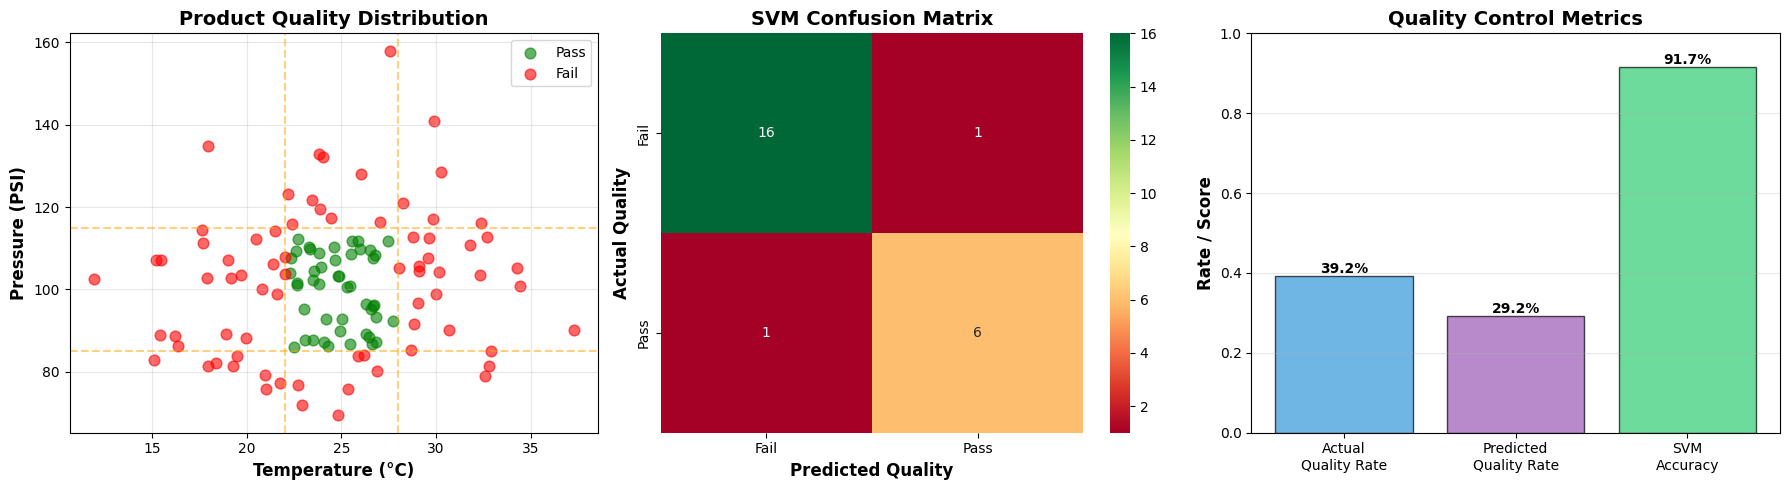

✓ SVM visualizations created
  Accuracy: 91.7%
  Quality Pass Rate: 39.2%


In [5]:
print("\n" + "=" * 70)
print("SVM VISUALIZATIONS")
print("=" * 70)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)
n_products = 120
temperature = np.random.normal(25, 5, n_products)
pressure = np.random.normal(100, 15, n_products)

quality = ((temperature > 22) & (temperature < 28) &
           (pressure > 85) & (pressure < 115)).astype(int)

df_quality = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'Quality': quality
})

X = df_quality[['Temperature', 'Pressure']]
y = df_quality['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))


pass_products = df_quality[df_quality['Quality'] == 1]
fail_products = df_quality[df_quality['Quality'] == 0]
axes[0].scatter(pass_products['Temperature'], pass_products['Pressure'],
                alpha=0.6, color='green', label='Pass', s=60)
axes[0].scatter(fail_products['Temperature'], fail_products['Pressure'],
                alpha=0.6, color='red', label='Fail', s=60)
axes[0].set_xlabel('Temperature (°C)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Pressure (PSI)', fontsize=12, fontweight='bold')
axes[0].set_title('Product Quality Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


axes[0].axvline(x=22, color='orange', linestyle='--', alpha=0.5, label='Quality Boundaries')
axes[0].axvline(x=28, color='orange', linestyle='--', alpha=0.5)
axes[0].axhline(y=85, color='orange', linestyle='--', alpha=0.5)
axes[0].axhline(y=115, color='orange', linestyle='--', alpha=0.5)


cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='RdYlGn', ax=axes[1],
            xticklabels=['Fail', 'Pass'],
            yticklabels=['Fail', 'Pass'], cbar=True)
axes[1].set_xlabel('Predicted Quality', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual Quality', fontsize=12, fontweight='bold')
axes[1].set_title('SVM Confusion Matrix', fontsize=14, fontweight='bold')


quality_rate = quality.mean()
predicted_quality_rate = y_pred_svm.mean()
metrics = ['Actual\nQuality Rate', 'Predicted\nQuality Rate', 'SVM\nAccuracy']
values = [quality_rate, predicted_quality_rate, accuracy_score(y_test, y_pred_svm)]
colors_metrics = ['#3498db', '#9b59b6', '#2ecc71']
bars = axes[2].bar(metrics, values, color=colors_metrics, alpha=0.7, edgecolor='black')
axes[2].set_ylabel('Rate / Score', fontsize=12, fontweight='bold')
axes[2].set_title('Quality Control Metrics', fontsize=14, fontweight='bold')
axes[2].set_ylim([0, 1])
axes[2].grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('5_svm.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ SVM visualizations created")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_svm):.1%}")
print(f"  Quality Pass Rate: {quality.mean():.1%}")


K-MEANS CLUSTERING VISUALIZATIONS


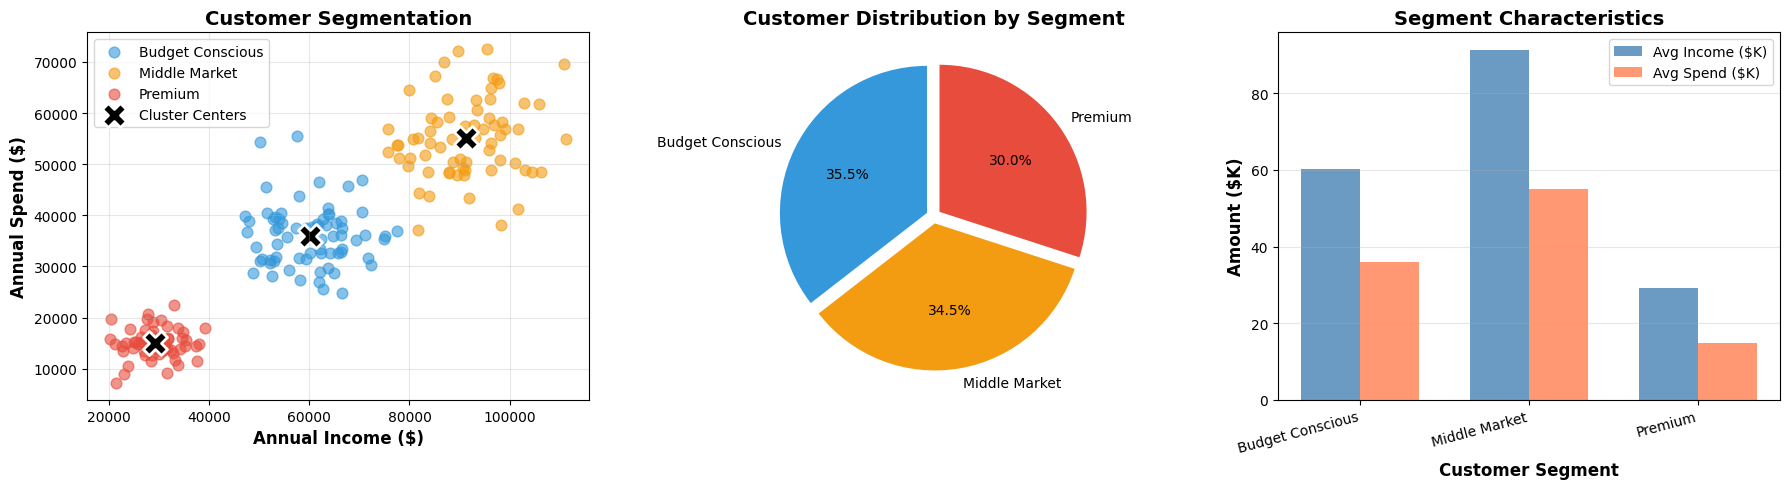

✓ K-Means Clustering visualizations created
  Segments Discovered: 3
  Budget Conscious: 71 customers (35.5%)
  Middle Market: 69 customers (34.5%)
  Premium: 60 customers (30.0%)


In [6]:
print("\n" + "=" * 70)
print("K-MEANS CLUSTERING VISUALIZATIONS")
print("=" * 70)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Added this import

np.random.seed(42)
segment1_income = np.random.normal(30000, 5000, 60)
segment1_spend = np.random.normal(15000, 3000, 60)
said:segment2_income = np.random.normal(60000, 8000, 70)
segment2_spend = np.random.normal(35000, 5000, 70)
segment3_income = np.random.normal(90000, 10000, 70)
segment3_spend = np.random.normal(55000, 8000, 70)

annual_income = np.concatenate([segment1_income, segment2_income, segment3_income])
annual_spend = np.concatenate([segment1_spend, segment2_spend, segment3_spend])

df_customers = pd.DataFrame({
    'Annual_Income': annual_income,
    'Annual_Spend': annual_spend
})

X = df_customers[['Annual_Income', 'Annual_Spend']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
df_customers['Cluster'] = clusters

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Customer Segments
segment_names = ['Budget Conscious', 'Middle Market', 'Premium']
colors_segments = ['#3498db', '#f39c12', '#e74c3c']

for i in range(3):
    cluster_data = df_customers[df_customers['Cluster'] == i]
    axes[0].scatter(cluster_data['Annual_Income'], cluster_data['Annual_Spend'],
                   alpha=0.6, color=colors_segments[i], label=segment_names[i], s=60)

# Plot cluster centers
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=300,
               edgecolor='white', linewidth=2, label='Cluster Centers')
axes[0].set_xlabel('Annual Income ($)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Annual Spend ($)', fontsize=12, fontweight='bold')
axes[0].set_title('Customer Segmentation', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Segment Distribution
cluster_counts = df_customers['Cluster'].value_counts().sort_index()
axes[1].pie(cluster_counts.values, labels=segment_names, autopct='%1.1f%%',
           colors=colors_segments, startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Customer Distribution by Segment', fontsize=14, fontweight='bold')

# Plot 3: Segment Characteristics
x_pos = np.arange(len(segment_names))
avg_income = [centers[i, 0] for i in range(3)]
avg_spend = [centers[i, 1] for i in range(3)]

width = 0.35
axes[2].bar(x_pos - width/2, [x/1000 for x in avg_income], width,
           label='Avg Income ($K)', color='steelblue', alpha=0.8)
axes[2].bar(x_pos + width/2, [x/1000 for x in avg_spend], width,
           label='Avg Spend ($K)', color='coral', alpha=0.8)
axes[2].set_xlabel('Customer Segment', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Amount ($K)', fontsize=12, fontweight='bold')
axes[2].set_title('Segment Characteristics', fontsize=14, fontweight='bold')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(segment_names, rotation=15, ha='right')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('6_kmeans_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ K-Means Clustering visualizations created")
print(f"  Segments Discovered: {len(np.unique(clusters))}")
for i, name in enumerate(segment_names):
    count = cluster_counts.iloc[i]
    print(f"  {name}: {count} customers ({count/len(df_customers)*100:.1f}%)")


FEATURE SELECTION VISUALIZATIONS


/tmp/ipython-input-3854144659.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_business['Customer_Count'].fillna(df_business['Customer_Count'].median(), inplace=True)
/tmp/ipython-input-3854144659.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

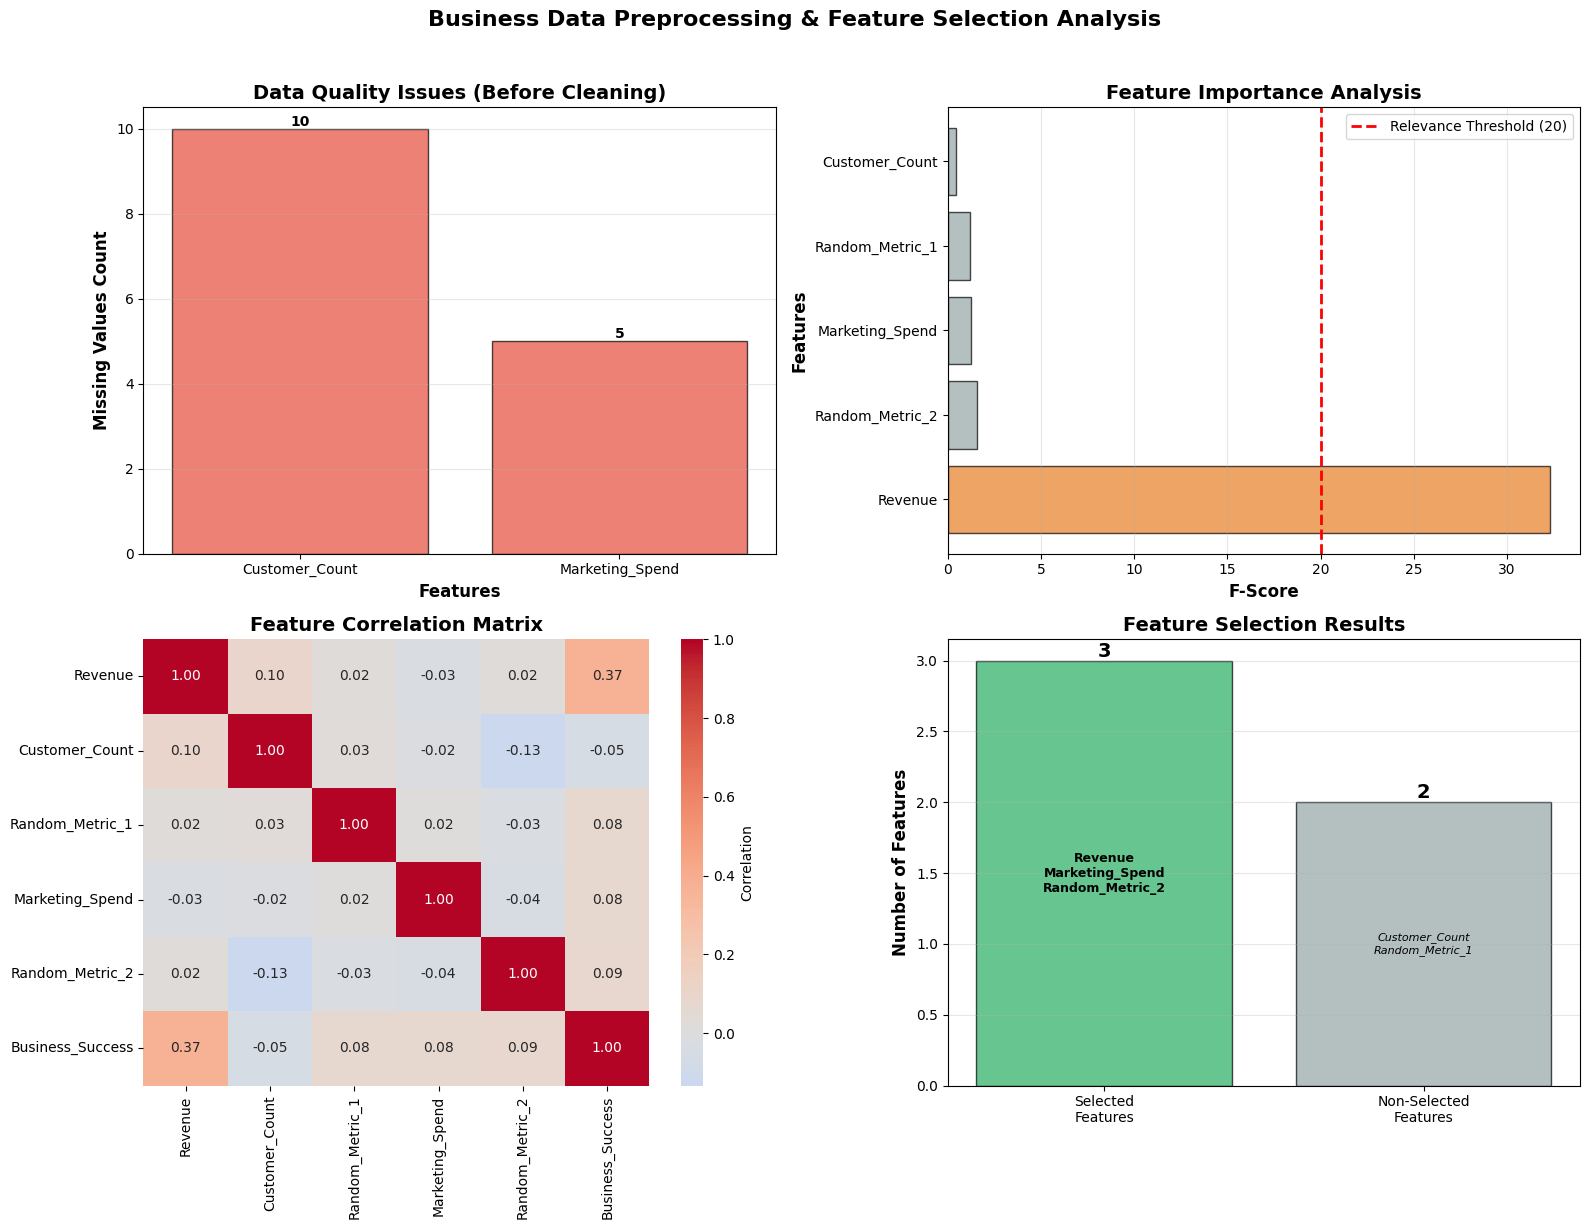

In [7]:
print("\n" + "=" * 70)
print("FEATURE SELECTION VISUALIZATIONS")
print("=" * 70)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif # Added this import

np.random.seed(42)
n_samples = 200

revenue = np.random.normal(500000, 100000, n_samples)
customers = np.random.normal(1000, 200, n_samples)
random_metric1 = np.random.random(n_samples) * 100
marketing_spend = np.random.normal(50000, 15000, n_samples)
random_metric2 = np.random.random(n_samples) * 50

success_score = (revenue * 0.00001 + marketing_spend * 0.00002 + np.random.normal(0, 2, n_samples))
business_success = (success_score > np.median(success_score)).astype(int)

df_business = pd.DataFrame({
    'Revenue': revenue,
    'Customer_Count': customers,
    'Random_Metric_1': random_metric1,
    'Marketing_Spend': marketing_spend,
    'Random_Metric_2': random_metric2,
    'Business_Success': business_success
})


missing_indices = np.random.choice(df_business.index, 15, replace=False)
df_business.loc[missing_indices[:10], 'Customer_Count'] = np.nan
df_business.loc[missing_indices[10:], 'Marketing_Spend'] = np.nan

missing_before = df_business.isnull().sum()

df_business['Customer_Count'].fillna(df_business['Customer_Count'].median(), inplace=True)
df_business['Marketing_Spend'].fillna(df_business['Marketing_Spend'].mean(), inplace=True)


X = df_business.drop('Business_Success', axis=1)
y = df_business['Business_Success']

selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Score': selector.scores_
}).sort_values('Importance_Score', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))


features_with_missing = ['Customer_Count', 'Marketing_Spend']
missing_counts = [missing_before[f] for f in features_with_missing]
x_pos = np.arange(len(features_with_missing))

axes[0, 0].bar(x_pos, missing_counts, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Features', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Missing Values Count', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Data Quality Issues (Before Cleaning)', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(features_with_missing)
axes[0, 0].grid(True, alpha=0.3, axis='y')

for i, count in enumerate(missing_counts):
    axes[0, 0].text(i, count, str(count), ha='center', va='bottom', fontweight='bold')


colors_importance = ['#27ae60' if score > 50 else '#e67e22' if score > 20 else '#95a5a6'
                     for score in feature_scores['Importance_Score']]
axes[0, 1].barh(feature_scores['Feature'], feature_scores['Importance_Score'],
                color=colors_importance, alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('F-Score', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Features', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Feature Importance Analysis', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')


threshold = 20
axes[0, 1].axvline(x=threshold, color='red', linestyle='--', linewidth=2,
                   label=f'Relevance Threshold ({threshold})')
axes[0, 1].legend()


correlation_matrix = df_business.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, ax=axes[1, 0], cbar_kws={'label': 'Correlation'})
axes[1, 0].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')


selected_mask = selector.get_support()
selected_features = X.columns[selected_mask].tolist()
non_selected_features = X.columns[~selected_mask].tolist()

categories = ['Selected\nFeatures', 'Non-Selected\nFeatures']
counts = [len(selected_features), len(non_selected_features)]
colors_selection = ['#27ae60', '#95a5a6']

bars = axes[1, 1].bar(categories, counts, color=colors_selection, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Number of Features', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Feature Selection Results', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   str(count), ha='center', va='bottom', fontweight='bold', fontsize=14)


axes[1, 1].text(0, counts[0]*0.5, '\n'.join(selected_features),
               ha='center', va='center', fontsize=9, fontweight='bold')
axes[1, 1].text(1, counts[1]*0.5, '\n'.join(non_selected_features),
               ha='center', va='center', fontsize=8, style='italic')

plt.suptitle('Business Data Preprocessing & Feature Selection Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('7_feature_selection_analysis.png', dpi=300, bbox_inches='tight')
plt.show()